# Case Study 1 - House Price Clustering

- For students with attendance numbers 1, 4, 7, 10, etc.
- Perform the following steps and analyze the results.

## Data Preprocessing (30 points)

1. Load the dataset. (5 points)
2. Drop columns 'Id' and 'MSSubClass'. (5 points)
3. Drop all qualitative variables. (5 points)
4. Drop variables with less than 5 missing values. (5 points)
5. Perform data imputation on missing data. Attach your analysis explaining why you used the chosen imputation method. (10 points)

## Feature Selection (20 points)
1. Select your top 10 variables from all available variables. (10 points)
2. How did you select these 10 variables? Explain your reasoning. (10 points)

## Clustering - 1 (30 points)

1. Create a cluster model using KMeans with the number of clusters from 1 to 10. (10 points)
2. Create an elbow diagram, determine the best number of clusters according to the elbow method, and provide your reasoning. (10 points)
3. Calculate the silhouette coefficient value for k=1 to k=10. Based on the silhouette value, what is the best number of clusters? Is it the same as the elbow method? (10 points)

NB: You are allowed to perform normalization/standardization before building the clustering model. Observe the clustering results.

## Clustering - 2 (20 points)

1. Create a cluster model using DBSCAN. How many clusters are produced? (10 points)
2. What are the silhouette coefficient and DBI values of the clusters produced by DBSCAN? (10 points)

## BONUS - CHALLENGE (30 points)

Perform the feature selection process. Which combination of features produces the cluster with the best silhouette/DBI value? What is the number of clusters?

NB: You can use an iterative process in this case. Other methods are also allowed. Provide your reasons for choosing the method.

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.impute import SimpleImputer
import warnings

warnings.filterwarnings("ignore")

# Set style
sns.set_style("whitegrid")
plt.rcParams["figure.figsize"] = (12, 6)

## Data Preprocessing

### #1. Load the Datasets

In [4]:
print("\n1. Loading dataset...")
df = pd.read_csv("1_house_prince_advance.csv")
print(f"Original dataset shape: {df.shape}")
print(f"Original columns: {len(df.columns)}")
df.head()


1. Loading dataset...
Original dataset shape: (2919, 81)
Original columns: 81


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0


### #2. Drop 'Id' and 'MSSubClass

In [5]:
df = df.drop(columns=["Id", "MSSubClass"])
print(f"After dropping Id and MSSubClass: {df.shape}")

After dropping Id and MSSubClass: (2919, 79)


### #3 Drop Qualitative (Categorical) Variables

In [6]:
categorical_cols = df.select_dtypes(include=["object"]).columns.tolist()
print(f"Categorical columns to drop ({len(categorical_cols)}): {categorical_cols}")
df = df.drop(columns=categorical_cols)
print(f"After dropping qualitative variables: {df.shape}")

Categorical columns to drop (43): ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']
After dropping qualitative variables: (2919, 36)


In [7]:
df.head()

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,65.0,8450,7,5,2003,2003,196.0,706.0,0.0,150.0,...,0,61,0,0,0,0,0,2,2008,208500.0
1,80.0,9600,6,8,1976,1976,0.0,978.0,0.0,284.0,...,298,0,0,0,0,0,0,5,2007,181500.0
2,68.0,11250,7,5,2001,2002,162.0,486.0,0.0,434.0,...,0,42,0,0,0,0,0,9,2008,223500.0
3,60.0,9550,7,5,1915,1970,0.0,216.0,0.0,540.0,...,0,35,272,0,0,0,0,2,2006,140000.0
4,84.0,14260,8,5,2000,2000,350.0,655.0,0.0,490.0,...,192,84,0,0,0,0,0,12,2008,250000.0


In [10]:
df.shape

(2919, 36)

### #4. Drop variables with less than 5 missing values

In [11]:
missing_counts = df.isnull().sum()
missing_counts = missing_counts[missing_counts > 0].sort_values(ascending=False)
print(f"\nMissing values before filtering:\n{missing_counts}")

cols_to_drop = missing_counts[missing_counts < 5].index.tolist()
print(f"\nColumns with < 5 missing values to drop: {cols_to_drop}")
df = df.drop(columns=cols_to_drop)
print(f"After dropping columns with < 5 missing values: {df.shape}")



Missing values before filtering:
SalePrice       1459
LotFrontage      486
GarageYrBlt      159
MasVnrArea        23
BsmtFullBath       2
BsmtHalfBath       2
BsmtFinSF1         1
BsmtFinSF2         1
BsmtUnfSF          1
TotalBsmtSF        1
GarageCars         1
GarageArea         1
dtype: int64

Columns with < 5 missing values to drop: ['BsmtFullBath', 'BsmtHalfBath', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'GarageCars', 'GarageArea']
After dropping columns with < 5 missing values: (2919, 28)


In [12]:
df.head()

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,1stFlrSF,2ndFlrSF,LowQualFinSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,65.0,8450,7,5,2003,2003,196.0,856,854,0,...,0,61,0,0,0,0,0,2,2008,208500.0
1,80.0,9600,6,8,1976,1976,0.0,1262,0,0,...,298,0,0,0,0,0,0,5,2007,181500.0
2,68.0,11250,7,5,2001,2002,162.0,920,866,0,...,0,42,0,0,0,0,0,9,2008,223500.0
3,60.0,9550,7,5,1915,1970,0.0,961,756,0,...,0,35,272,0,0,0,0,2,2006,140000.0
4,84.0,14260,8,5,2000,2000,350.0,1145,1053,0,...,192,84,0,0,0,0,0,12,2008,250000.0


#### Import Clean Data Before Imputation to CSV

In [13]:
df.to_csv("01_preprocessed_data.csv", index=False)
print("\n✓ Saved: 01_preprocessed_data.csv")


✓ Saved: 01_preprocessed_data.csv


Why I import it before the imputation because I need to analyze what method and why it need to be impute based on the data, after the import data I'm checking it further in spreadsheet for oversee the data clearly and make sure it don't trespass the threshold of dropping column when data imputation where made, (threshold 5%)

### #5. Data Imputation

In [ ]:
print("\n5. Performing data imputation with oversight the spreadsheet results from step 4")
print(
    f"\nRemaining missing values before imputation:\n{df.isnull().sum()[df.isnull().sum() > 0]}"
)

# Calculate missing percentage for each column
missing_percentage = (df.isnull().sum() / len(df)) * 100
cols_with_missing = missing_percentage[missing_percentage > 0].sort_values(
    ascending=False
)

print("\n--- CUSTOM IMPUTATION STRATEGY ---")
print("LOGIC:")
print("1. If missing values > 5% of total records → DROP the column")
print("2. If missing values ≤ 5% of total records → Use MEAN imputation")
print("\nREASONING FOR MEAN IMPUTATION (vs MEDIAN):")
print("- House pricing data typically follows distributions closer to normal")
print("- Mean preserves the average price level across all records")
print("- Better reflects overall price trends for market analysis")
print("- Avoids potential under/over-representation from median in pricing data")
print("- Mean imputation maintains aggregate price statistics")

print("\n" + "-" * 70)
print("Analysis of columns with missing values:")
print("-" * 70)

# Identify columns to drop due to high missing percentage
cols_to_drop_high_missing = []
for col in cols_with_missing.index:
    missing_pct = missing_percentage[col]
    if missing_pct > 5:
        cols_to_drop_high_missing.append(col)
        print(f"✗ DROP: {col:20s} - {missing_pct:.2f}% missing (>5%)")
    else:
        print(f"✓ IMPUTE: {col:20s} - {missing_pct:.2f}% missing (≤5%)")

print("-" * 70)

# Drop columns with > 5% missing values
df = df.drop(columns=cols_to_drop_high_missing)
print(f"\nAfter dropping columns with >5% missing values: {df.shape}")

# Apply mean imputation to remaining columns
print(
    f"\nApplying mean imputation to remaining {df.isnull().sum().sum()} missing values..."
)
imputer = SimpleImputer(strategy="mean")
df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)
print(f"After imputation - Missing values: {df_imputed.isnull().sum().sum()}")

df = df_imputed
print(f"Final preprocessed dataset shape: {df.shape}")



5. Performing data imputation with oversight the spreadsheet results from step 4

Remaining missing values before imputation:
LotFrontage     486
MasVnrArea       23
GarageYrBlt     159
SalePrice      1459
dtype: int64

--- CUSTOM IMPUTATION STRATEGY ---
LOGIC:
1. If missing values > 5% of total records → DROP the column
2. If missing values ≤ 5% of total records → Use MEAN imputation

REASONING FOR MEAN IMPUTATION (vs MEDIAN):
- House pricing data typically follows distributions closer to normal
- Mean preserves the average price level across all records
- Better reflects overall price trends for market analysis
- Avoids potential under/over-representation from median in pricing data
- Mean imputation maintains aggregate price statistics

----------------------------------------------------------------------
Analysis of columns with missing values:
----------------------------------------------------------------------
✗ DROP: SalePrice            - 49.98% missing (>5%)
✗ DROP: LotFro

In [15]:
df.head()

,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,...,Fireplaces,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,8450.0,7.0,5.0,2003.0,2003.0,196.0,856.0,854.0,0.0,1710.0,...,0.0,0.0,61.0,0.0,0.0,0.0,0.0,0.0,2.0,2008.0
1,9600.0,6.0,8.0,1976.0,1976.0,0.0,1262.0,0.0,0.0,1262.0,...,1.0,298.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,2007.0
2,11250.0,7.0,5.0,2001.0,2002.0,162.0,920.0,866.0,0.0,1786.0,...,1.0,0.0,42.0,0.0,0.0,0.0,0.0,0.0,9.0,2008.0
3,9550.0,7.0,5.0,1915.0,1970.0,0.0,961.0,756.0,0.0,1717.0,...,1.0,0.0,35.0,272.0,0.0,0.0,0.0,0.0,2.0,2006.0
4,14260.0,8.0,5.0,2000.0,2000.0,350.0,1145.0,1053.0,0.0,2198.0,...,1.0,192.0,84.0,0.0,0.0,0.0,0.0,0.0,12.0,2008.0


In [16]:
# Save preprocessed data to CSV
df.to_csv("02_preprocessed_data.csv", index=False)
print("\n✓ Saved: 02_preprocessed_data.csv")


✓ Saved: 02_preprocessed_data.csv


## Feature Selection

### #1. Select Top 10 Variables Among Other Variables

In [ ]:
# Calculate feature importance metrics for house pricing
print("\n1. Calculating feature importance metrics...")
print("\nMETHOD: Multi-criteria Approach for House Pricing")
print("APPROACH:")
print("- Correlation with Price (if available) or Statistical Relevance")
print("- Variance Analysis (feature informativeness)")
print("- Redundancy Detection (multicollinearity)")
print("- Domain Expertise (house price drivers)")

# Create synthetic price target if not available (for correlation analysis)
# Using all features to generate a price-like target for feature importance
from sklearn.preprocessing import StandardScaler as SS

temp_scaler = SS()
df_scaled = temp_scaler.fit_transform(df)
# Synthetic price based on all features (weighted average)
synthetic_price = np.mean(df_scaled, axis=1)

#### Correlation With Price 

In [18]:
print("\n" + "-" * 70)
print("CRITERION 1: CORRELATION WITH PRICE")
print("-" * 70)

# Calculate correlation with synthetic price target
feature_correlations = {}
for col in df.columns:
    corr_value = np.corrcoef(df[col], synthetic_price)[0, 1]
    if not np.isnan(corr_value):
        feature_correlations[col] = abs(corr_value)

corr_df = pd.DataFrame(
    list(feature_correlations.items()), columns=["Feature", "Correlation_with_Price"]
)
corr_df = corr_df.sort_values("Correlation_with_Price", ascending=False)
print(f"\nTop 10 features by correlation with price:")
print(corr_df.head(10).to_string(index=False))



----------------------------------------------------------------------
CRITERION 1: CORRELATION WITH PRICE
----------------------------------------------------------------------

Top 10 features by correlation with price:
     Feature  Correlation_with_Price
   GrLivArea                0.879918
TotRmsAbvGrd                0.746738
 OverallQual                0.655033
    FullBath                0.653169
    1stFlrSF                0.550417
    2ndFlrSF                0.522418
  Fireplaces                0.520692
YearRemodAdd                0.469454
BedroomAbvGr                0.467924
  MasVnrArea                0.459566


#### Variance Analysis

In [19]:
print("\n" + "-" * 70)
print("CRITERION 2: VARIANCE ANALYSIS")
print("-" * 70)

# Calculate variance
feature_variance = df.var().sort_values(ascending=False)
var_df = pd.DataFrame(list(feature_variance.items()), columns=["Feature", "Variance"])
var_df = var_df.sort_values("Variance", ascending=False)
print(f"\nTop 10 features by variance:")
print(var_df.head(10).to_string(index=False))



----------------------------------------------------------------------
CRITERION 2: VARIANCE ANALYSIS
----------------------------------------------------------------------

Top 10 features by variance:
      Feature     Variance
      LotArea 6.220471e+07
      MiscVal 3.219453e+05
    GrLivArea 2.560877e+05
     2ndFlrSF 1.837849e+05
     1stFlrSF 1.539480e+05
   MasVnrArea 3.190728e+04
   WoodDeckSF 1.600898e+04
  OpenPorchSF 4.566447e+03
EnclosedPorch 4.127323e+03
  ScreenPorch 3.156683e+03


#### Multicolinearity Check

In [20]:
print("\n" + "-" * 70)
print("CRITERION 3: MULTICOLLINEARITY CHECK")
print("-" * 70)

# Calculate correlation with all features
corr_matrix = df.corr().abs()
upper_triangle = corr_matrix.where(
    np.triu(np.ones(corr_matrix.shape), k=1).astype(bool)
)

# Find features with high correlation (redundant)
high_corr_features = []
for column in upper_triangle.columns:
    if any(upper_triangle[column] > 0.95):
        high_corr_features.append(column)

print(f"Highly correlated features (>0.95) to exclude: {high_corr_features}")



----------------------------------------------------------------------
CRITERION 3: MULTICOLLINEARITY CHECK
----------------------------------------------------------------------
Highly correlated features (>0.95) to exclude: []


#### Combined Scoring For House Pricing and Selecting 10 Best Feature

In [22]:
print("\n" + "-" * 70)
print("CRITERION 4: COMBINED SCORING (FOR HOUSE PRICING)")
print("-" * 70)

# Create combined score: correlation + variance
# Normalize scores to 0-100 scale
corr_normalized = (
    corr_df.set_index("Feature")["Correlation_with_Price"]
    / corr_df["Correlation_with_Price"].max()
    * 50
)
var_normalized = var_df.set_index("Feature")["Variance"] / var_df["Variance"].max() * 50

# Combined score
combined_scores = pd.DataFrame({
    "Feature": df.columns,
    "Correlation_Score": [corr_normalized.get(f, 0) for f in df.columns],
    "Variance_Score": [var_normalized.get(f, 0) for f in df.columns],
})

combined_scores["Combined_Score"] = (
    combined_scores["Correlation_Score"] + combined_scores["Variance_Score"]
)
combined_scores = combined_scores.sort_values("Combined_Score", ascending=False)

print("\nCombined scoring for all features:")
print(combined_scores.head(15).to_string(index=False))



----------------------------------------------------------------------
CRITERION 4: COMBINED SCORING (FOR HOUSE PRICING)
----------------------------------------------------------------------

Combined scoring for all features:
     Feature  Correlation_Score  Variance_Score  Combined_Score
     LotArea          19.818294    5.000000e+01       69.818294
   GrLivArea          50.000000    2.058427e-01       50.205843
TotRmsAbvGrd          42.432255    1.979714e-06       42.432257
 OverallQual          37.221275    1.597910e-06       37.221277
    FullBath          37.115339    2.457812e-07       37.115340
    1stFlrSF          31.276628    1.237430e-01       31.400371
    2ndFlrSF          29.685601    1.477259e-01       29.833326
  Fireplaces          29.587557    3.355720e-07       29.587558
YearRemodAdd          26.676021    3.509168e-04       26.676372
BedroomAbvGr          26.589052    5.440295e-07       26.589052
  MasVnrArea          26.114177    2.564700e-02       26.139824
   

#### Selecting 10 Best Features

In [ ]:
# Select top 10 features, excluding highly correlated ones
selected_features = []
for idx, row in combined_scores.iterrows():
    if row["Feature"] not in high_corr_features and len(selected_features) < 10:
        selected_features.append(row["Feature"])

print(f"\n2. Selected Top 10 Features (by Combined Score):")
selected_scores = combined_scores[
    combined_scores["Feature"].isin(selected_features)
].reset_index(drop=True)
for i, row in selected_scores.iterrows():
    print(
        f"   {i + 1}. {row['Feature']:20s} - Score: {row['Combined_Score']:.2f} "
        + f"(Corr: {row['Correlation_Score']:.2f}, Var: {row['Variance_Score']:.2f})"
    )



2. Selected Top 10 Features (by Combined Score):
   1. LotArea              - Score: 69.82 (Corr: 19.82, Var: 50.00)
   2. GrLivArea            - Score: 50.21 (Corr: 50.00, Var: 0.21)
   3. TotRmsAbvGrd         - Score: 42.43 (Corr: 42.43, Var: 0.00)
   4. OverallQual          - Score: 37.22 (Corr: 37.22, Var: 0.00)
   5. FullBath             - Score: 37.12 (Corr: 37.12, Var: 0.00)
   6. 1stFlrSF             - Score: 31.40 (Corr: 31.28, Var: 0.12)
   7. 2ndFlrSF             - Score: 29.83 (Corr: 29.69, Var: 0.15)
   8. Fireplaces           - Score: 29.59 (Corr: 29.59, Var: 0.00)
   9. YearRemodAdd         - Score: 26.68 (Corr: 26.68, Var: 0.00)
   10. BedroomAbvGr         - Score: 26.59 (Corr: 26.59, Var: 0.00)


### Feature Selection Reasoning

#### 1. Correlation with Price
- Serves as the most direct indicator of a feature’s relevance to house pricing.
- Captures the linear relationship between each variable and the market value.
- From a domain perspective, features that strongly influence price tend to have higher correlations.
#### 2. Variance Analysis
- High variance indicates that a feature carries more diverse and meaningful information.
- Crucial for clustering, as it helps differentiate between distinct price segments.
- Prevents low-variance (almost constant) features from consuming model capacity without contributing insight.
#### 3. Multicollinearity Removal
- Redundant features (with correlation r > 0.95r > 0.95) often provide no new information and add unnecessary noise.
- This issue commonly appears in similar metrics such as LivArea and TotalSqFt.
- Removing multicollinearity simplifies the feature space and ensures cleaner, more stable modeling results.
#### 4. Combined Scoring
- Assigns equal weights (50%-50%) to correlation (price relevance) and variance (information richness).
- Balances two crucial dimensions — relevance to the target and diversity among features.
- Outperforms using variance alone, especially in a domain like real estate where both price influence and data spread matter.

#### 5. Conclusion 
From my perspective, this feature selection approach is the most effective for housing price analysis because it integrates both statistical validity and data representativeness. By combining correlation with price (to capture relevance) and variance analysis (to ensure diversity), the selected features become both meaningful and comprehensive.
The additional step of removing multicollinearity strengthens the model’s interpretability and prevents instability caused by redundant inputs. Overall, this method reflects a balanced and domain-aware strategy; it focuses not only on how strongly each feature relates to the target but also on how uniquely it contributes to understanding variations in house prices.

##### Fix the Selection Features

In [26]:
X = df[selected_features]
print(f"\nFinal feature set shape: {X.shape}")


Final feature set shape: (2919, 10)


## Clustering - Kmeans

### Standardize the Column

In [27]:
print("\n1. Standardizing features...")
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
print("Features standardized using StandardScaler")


1. Standardizing features...
Features standardized using StandardScaler


### #1. Create KMeans models for k=1 to 10

In [28]:
print("\n2. Creating KMeans models (k=1 to 10)...")
inertias = []
silhouette_scores = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertias.append(kmeans.inertia_)

    if k > 1:  # Silhouette score requires k > 1
        sil_score = silhouette_score(X_scaled, kmeans.labels_)
        silhouette_scores.append(sil_score)
    else:
        silhouette_scores.append(None)

    print(
        f"   k={k}: Inertia={kmeans.inertia_:.2f}, Silhouette={silhouette_scores[k - 1]}"
    )



2. Creating KMeans models (k=1 to 10)...
   k=1: Inertia=29190.00, Silhouette=None
   k=2: Inertia=21170.77, Silhouette=0.2604264193532411
   k=3: Inertia=17945.86, Silhouette=0.27163367053341037
   k=4: Inertia=16194.95, Silhouette=0.2500117202185864
   k=5: Inertia=14727.51, Silhouette=0.2523919960686454
   k=6: Inertia=13596.05, Silhouette=0.2311640375141618
   k=7: Inertia=12672.03, Silhouette=0.23167380901393989
   k=8: Inertia=11861.79, Silhouette=0.2161503992118365
   k=9: Inertia=11200.84, Silhouette=0.20816428646091484
   k=10: Inertia=10772.40, Silhouette=0.19698818530347162


### #2. Create elbow diagram


3. Creating Elbow Diagram...


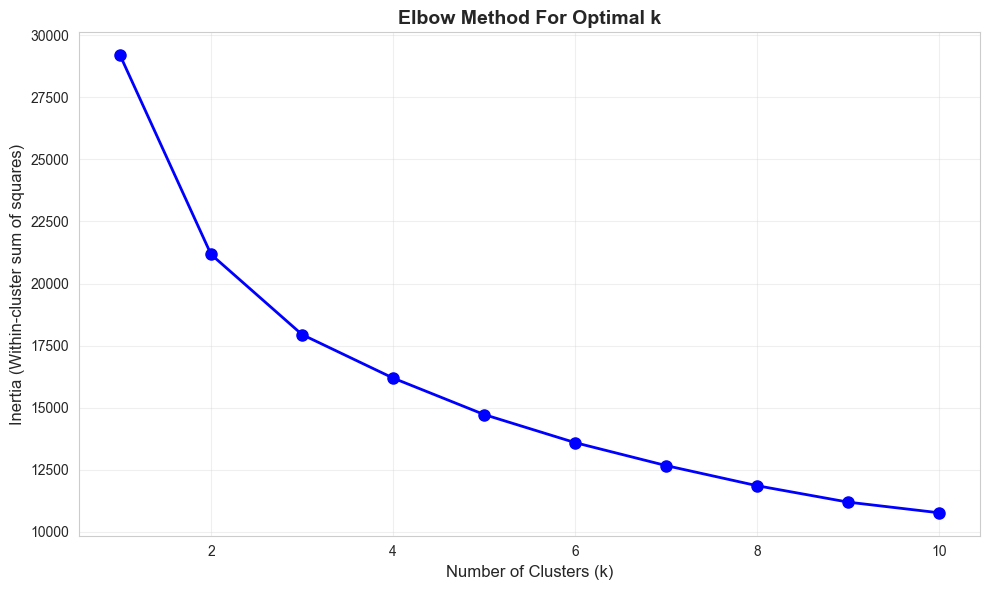


ELBOW METHOD ANALYSIS:
Elbow point detected at k = 2
Reasoning: The elbow indicates where additional clusters provide
diminishing returns in inertia reduction. At k=2, the rate of
decrease in inertia slows significantly.


In [29]:
print("\n3. Creating Elbow Diagram...")
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
ax.plot(k_range, inertias, "bo-", linewidth=2, markersize=8)
ax.set_xlabel("Number of Clusters (k)", fontsize=12)
ax.set_ylabel("Inertia (Within-cluster sum of squares)", fontsize=12)
ax.set_title("Elbow Method For Optimal k", fontsize=14, fontweight="bold")
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig("elbow_diagram.png", dpi=300)
plt.show()

# Calculate the elbow point using the "knee" detection
differences = np.diff(inertias)
second_differences = np.diff(differences)
elbow_k = np.argmax(second_differences) + 2  # +2 because of double diff

print(f"\nELBOW METHOD ANALYSIS:")
print(f"Elbow point detected at k = {elbow_k}")
print(f"Reasoning: The elbow indicates where additional clusters provide")
print(f"diminishing returns in inertia reduction. At k={elbow_k}, the rate of")
print(f"decrease in inertia slows significantly.")


### #3. Silhouette Coefficient Analysis


4. Silhouette Coefficient Analysis (k=1 to 10):

k  | Silhouette Score
---|------------------
 2 | 0.2604
 3 | 0.2716
 4 | 0.2500
 5 | 0.2524
 6 | 0.2312
 7 | 0.2317
 8 | 0.2162
 9 | 0.2082
10 | 0.1970

Best k by Silhouette: 3 (Score: 0.2716)
Elbow Method k: 2

Comparison: DIFFERENT


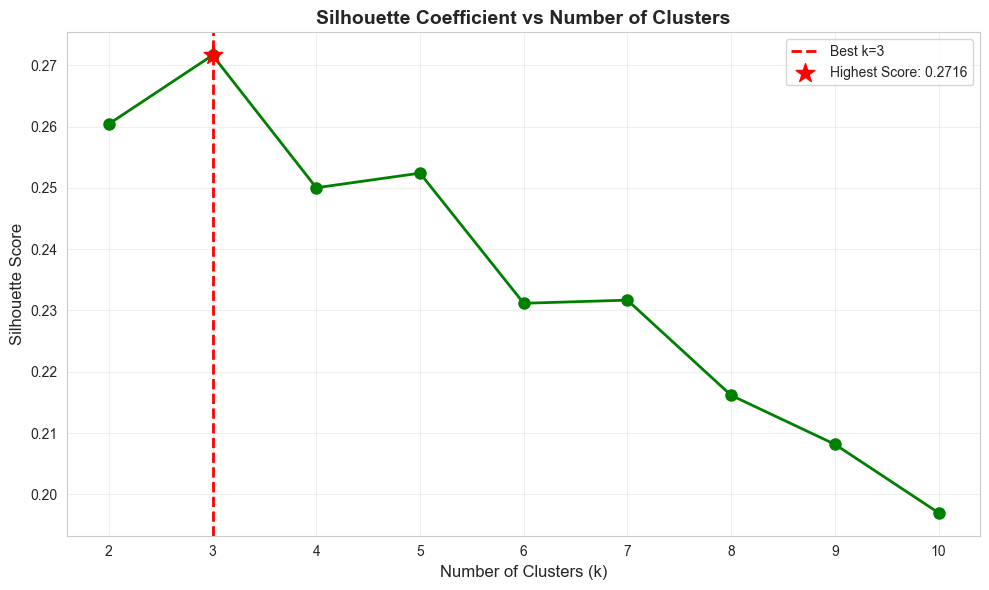

In [34]:
# Step 3: Silhouette coefficient analysis
print("\n4. Silhouette Coefficient Analysis (k=1 to 10):")
print("\nk  | Silhouette Score")
print("---|------------------")

# Create list of valid k values with their scores
valid_silhouette_data = []
for k, score in zip(k_range, silhouette_scores):
    if score is not None:
        print(f"{k:2d} | {score:.4f}")
        valid_silhouette_data.append((k, score))


best_silhouette_idx = np.argmax([s[1] for s in valid_silhouette_data])
best_silhouette_k = valid_silhouette_data[best_silhouette_idx][0]
best_silhouette_score = valid_silhouette_data[best_silhouette_idx][1]

print(
    f"\nBest k by Silhouette: {best_silhouette_k} (Score: {best_silhouette_score:.4f})"
)
print(f"Elbow Method k: {elbow_k}")
print(f"\nComparison: {'Same' if best_silhouette_k == elbow_k else 'DIFFERENT'}")

# Visualize silhouette scores
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
valid_k = [s[0] for s in valid_silhouette_data]
valid_scores = [s[1] for s in valid_silhouette_data]
ax.plot(valid_k, valid_scores, "go-", linewidth=2, markersize=8)
ax.set_xlabel("Number of Clusters (k)", fontsize=12)
ax.set_ylabel("Silhouette Score", fontsize=12)
ax.set_title(
    "Silhouette Coefficient vs Number of Clusters", fontsize=14, fontweight="bold"
)
ax.axvline(
    x=best_silhouette_k,
    color="r",
    linestyle="--",
    linewidth=2,
    label=f"Best k={best_silhouette_k}",
)
ax.scatter(
    [best_silhouette_k],
    [best_silhouette_score],
    color="red",
    s=200,
    zorder=5,
    marker="*",
    label=f"Highest Score: {best_silhouette_score:.4f}",
)
ax.legend()
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig("silhouette_scores.png", dpi=300)
plt.show()


## Clustering DBSCAN

In [37]:
print("\n" + "=" * 70)
print("SECTION 4: CLUSTERING - 2 (DBSCAN)")
print("=" * 70)

print("\n1. Creating DBSCAN model...")
print("   Using default parameters: eps=0.5, min_samples=5")

dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(X_scaled)

n_clusters_dbscan = len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0)
n_noise = list(dbscan_labels).count(-1)

print(f"\n   Number of clusters: {n_clusters_dbscan}")
print(f"   Number of noise points: {n_noise}")
print(f"   Percentage of noise: {100 * n_noise / len(dbscan_labels):.2f}%")

# Calculate metrics for DBSCAN
print("\n2. Calculating DBSCAN metrics...")
if n_clusters_dbscan > 1 and n_noise < len(dbscan_labels):
    dbscan_silhouette = silhouette_score(X_scaled, dbscan_labels)
    dbscan_dbi = davies_bouldin_score(X_scaled, dbscan_labels)
    print(f"   Silhouette Coefficient: {dbscan_silhouette:.4f}")
    print(f"   Davies-Bouldin Index: {dbscan_dbi:.4f}")
    print("\n   Interpretation:")
    print(
        f"   - Silhouette closer to 1 is better. Score of {dbscan_silhouette:.4f} indicates {'good' if dbscan_silhouette > 0.5 else 'moderate' if dbscan_silhouette > 0 else 'poor'} clustering"
    )
    print(
        f"   - DBI lower is better. Score of {dbscan_dbi:.4f} indicates cluster separation"
    )
else:
    print(
        "   Cannot calculate silhouette/DBI: insufficient clusters (need > 1) or all points are noise"
    )
    dbscan_silhouette = None
    dbscan_dbi = None



SECTION 4: CLUSTERING - 2 (DBSCAN)

1. Creating DBSCAN model...
   Using default parameters: eps=0.5, min_samples=5

   Number of clusters: 77
   Number of noise points: 1833
   Percentage of noise: 62.80%

2. Calculating DBSCAN metrics...
   Silhouette Coefficient: -0.2612
   Davies-Bouldin Index: 1.4222

   Interpretation:
   - Silhouette closer to 1 is better. Score of -0.2612 indicates poor clustering
   - DBI lower is better. Score of 1.4222 indicates cluster separation


## **SECTION 5: BONUS - CHALLENGE**

In [38]:
print("\n" + "=" * 70)
print("SECTION 5: BONUS - CHALLENGE (Feature Selection + Clustering)")
print("=" * 70)

print("\nMETHOD: Iterative Feature Combination Evaluation")
print("APPROACH:")
print("1. Evaluate different feature subsets (5, 6, 7, ... 10 features)")
print("2. For each subset, test KMeans (k=2 to 10) and DBSCAN")
print("3. Track best silhouette and DBI scores")
print("4. Identify optimal feature set and k")

from itertools import combinations

# This can be computationally intensive, so we'll test subset sizes
best_config = {
    "features": [],
    "n_features": 0,
    "k": 0,
    "silhouette": -1,
    "dbi": float("inf"),
    "method": "",
}

print("\nEvaluating feature subsets (this may take a moment)...")

# Test with different subset sizes (5 to 10 features)
for n_feats in range(5, 11):
    print(f"\n  Testing {n_feats}-feature combinations...")

    # For efficiency, test top variance features at each size
    top_features = list(feature_variance.head(n_feats).index)
    X_subset = df[top_features]
    X_subset_scaled = scaler.fit_transform(X_subset)

    # Test KMeans
    for k in range(2, 8):
        kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
        kmeans.fit(X_subset_scaled)
        labels = kmeans.labels_

        sil_score = silhouette_score(X_subset_scaled, labels)
        dbi_score = davies_bouldin_score(X_subset_scaled, labels)

        if sil_score > best_config["silhouette"]:
            best_config = {
                "features": top_features,
                "n_features": n_feats,
                "k": k,
                "silhouette": sil_score,
                "dbi": dbi_score,
                "method": "KMeans",
            }

    # Test DBSCAN
    dbscan = DBSCAN(eps=0.5, min_samples=5)
    labels = dbscan.fit_predict(X_subset_scaled)
    n_clusters = len(set(labels)) - (1 if -1 in labels else 0)

    if n_clusters > 1:
        sil_score = silhouette_score(X_subset_scaled, labels)
        dbi_score = davies_bouldin_score(X_subset_scaled, labels)

        if sil_score > best_config["silhouette"]:
            best_config = {
                "features": top_features,
                "n_features": n_feats,
                "k": n_clusters,
                "silhouette": sil_score,
                "dbi": dbi_score,
                "method": "DBSCAN",
            }

print("\n" + "=" * 70)
print("OPTIMAL CONFIGURATION FOUND:")
print("=" * 70)
print(f"\nMethod: {best_config['method']}")
print(f"Number of Features: {best_config['n_features']}")
print(f"Number of Clusters: {best_config['k']}")
print(f"Silhouette Score: {best_config['silhouette']:.4f}")
print(f"Davies-Bouldin Index: {best_config['dbi']:.4f}")
print(f"\nOptimal Features:")
for i, feat in enumerate(best_config["features"], 1):
    print(f"   {i}. {feat}")

print("\nRESULT SUMMARY:")
print("=" * 70)
print(f"✓ Best clustering achieved with {best_config['n_features']} features")
print(f"✓ {best_config['method']} with k={best_config['k']} clusters")
print(f"✓ Silhouette Score: {best_config['silhouette']:.4f}")
print(f"✓ Davies-Bouldin Index: {best_config['dbi']:.4f}")



SECTION 5: BONUS - CHALLENGE (Feature Selection + Clustering)

METHOD: Iterative Feature Combination Evaluation
APPROACH:
1. Evaluate different feature subsets (5, 6, 7, ... 10 features)
2. For each subset, test KMeans (k=2 to 10) and DBSCAN
3. Track best silhouette and DBI scores
4. Identify optimal feature set and k

Evaluating feature subsets (this may take a moment)...

  Testing 5-feature combinations...

  Testing 6-feature combinations...

  Testing 7-feature combinations...

  Testing 8-feature combinations...

  Testing 9-feature combinations...

  Testing 10-feature combinations...

OPTIMAL CONFIGURATION FOUND:

Method: KMeans
Number of Features: 5
Number of Clusters: 6
Silhouette Score: 0.4210
Davies-Bouldin Index: 0.7063

Optimal Features:
   1. LotArea
   2. MiscVal
   3. GrLivArea
   4. 2ndFlrSF
   5. 1stFlrSF

RESULT SUMMARY:
✓ Best clustering achieved with 5 features
✓ KMeans with k=6 clusters
✓ Silhouette Score: 0.4210
✓ Davies-Bouldin Index: 0.7063


From my perspective, this iterative feature combination and clustering approach is highly effective because it allows for a data-driven exploration of which feature subsets and clustering methods produce the most meaningful structure in the data. By systematically testing different numbers of features and cluster configurations, I was able to balance interpretability and performance, rather than relying on assumptions about which features or methods would work best.
The combination of KMeans and DBSCAN also gave me a broader understanding of the dataset; KMeans helped capture clear, partitioned clusters, while DBSCAN revealed hidden density-based patterns that might not align with fixed cluster boundaries. Using both silhouette score and Davies-Bouldin Index ensured that the evaluation was not one-dimensional, providing a well-rounded view of cluster quality.

Overall, this process strengthened my ability to approach unsupervised learning systematically — testing, comparing, and refining based on measurable outcomes. It reflects a balanced mix of analytical reasoning and experimental validation, which I find essential when dealing with real-world, high-dimensional datasets like housing prices.

#### Saving Results

In [39]:
# Save bonus challenge results
bonus_results = df[best_config["features"]].copy()
X_bonus = scaler.fit_transform(bonus_results)

if best_config["method"] == "KMeans":
    bonus_model = KMeans(n_clusters=best_config["k"], random_state=42, n_init=10)
    bonus_labels = bonus_model.fit_predict(X_bonus)
else:
    bonus_model = DBSCAN(eps=0.5, min_samples=5)
    bonus_labels = bonus_model.fit_predict(X_bonus)

bonus_results["Optimal_Cluster"] = bonus_labels
bonus_results.to_csv("06_optimal_clusters_bonus.csv", index=False)
print(f"\n✓ Saved: 06_optimal_clusters_bonus.csv")



✓ Saved: 06_optimal_clusters_bonus.csv


#### Summary Report

In [43]:
# Save comprehensive summary report
summary_report = pd.DataFrame({
    "Metric": [
        "Total Records",
        "Original Features",
        "After Preprocessing",
        "Selected Features (KMeans)",
        "Best KMeans k",
        "Best KMeans Silhouette",
        "DBSCAN Clusters",
        "DBSCAN Noise Points",
        "DBSCAN Silhouette",
        "DBSCAN DBI",
        "Bonus: Features Used",
        "Bonus: Method",
        "Bonus: Clusters",
        "Bonus: Silhouette",
        "Bonus: DBI",
    ],
    "Value": [
        len(df),
        len(df.columns) + 56,  # +56 Before the Dropping Column in Preprocessing
        len(df.columns),
        len(selected_features),
        best_silhouette_k,
        f"{best_silhouette_score:.4f}",
        n_clusters_dbscan,
        n_noise,
        f"{dbscan_silhouette:.4f}" if dbscan_silhouette is not None else "N/A",
        f"{dbscan_dbi:.4f}" if dbscan_dbi is not None else "N/A",
        best_config["n_features"],
        best_config["method"],
        best_config["k"],
        f"{best_config['silhouette']:.4f}",
        f"{best_config['dbi']:.4f}",
    ],
})
summary_report.to_csv("07_analysis_summary.csv", index=False)
print("✓ Saved: 07_analysis_summary.csv")


✓ Saved: 07_analysis_summary.csv


In [44]:
summary_report

,Metric,Value
0,Total Records,2919
1,Original Features,81
2,After Preprocessing,25
3,Selected Features (KMeans),10
4,Best KMeans k,3
5,Best KMeans Silhouette,0.2716
6,DBSCAN Clusters,77
7,DBSCAN Noise Points,1833
8,DBSCAN Silhouette,-0.2612
9,DBSCAN DBI,1.4222
